<a href="https://colab.research.google.com/github/adrianstando/Research-Workshops-Rashomon-Machine-Learning/blob/main/assignments/homework5/04_pdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import auc as auc_score
from sklearn.utils import shuffle

import pickle
import os.path

from sklearn.inspection import partial_dependence, plot_partial_dependence

## Load model results



In [3]:
results = np.load('results.npy', allow_pickle=True)

## Best models - params

In [8]:
results[results.mean_test_score > 0.86]['params'].values[0]

{'alpha': 12.854579625070118,
 'booster': 'dart',
 'colsample_bylevel': 1.0,
 'colsample_bytree': 0.1061578947368421,
 'lambda': 0.018079847457542493,
 'learning_rate': 0.07779328684150147,
 'max_depth': 9,
 'min_child_weight': 9.957540715712184,
 'n_estimators': 580,
 'subsample': 0.43157894736842106}

In [51]:
results[results.mean_test_score == np.max(results.mean_test_score)]['params'].values[0]

{'alpha': 55.31020117002273,
 'booster': 'gbtree',
 'colsample_bylevel': 0.26389473684210524,
 'colsample_bytree': 0.5793684210526315,
 'lambda': 1.440246537538758,
 'learning_rate': 0.03750320998681571,
 'max_depth': 14,
 'min_child_weight': 5.975035846617943,
 'n_estimators': 230,
 'subsample': 0.43157894736842106}

## Create model

### Data

In [22]:
X = np.load("X48.npy")

In [23]:
with open('y.npy', 'rb') as f:
  labels = pickle.load(f)
    
task = [yy[0] for yy in labels]
y = np.array(task)

In [24]:
def get_cv_samples_indexes(X, y):
    if os.path.isfile('samples.npy'):
        return np.load("samples.npy", allow_pickle = True)
    else:
        tab = []
        skf = StratifiedKFold(n_splits = 5)
        
        for train_index, test_index in skf.split(X, y):
            tab.append((train_index, test_index))
            
        with open('samples.npy', 'wb') as f:
            pickle.dump(tab, f)
            
        return tab

cv_tab = get_cv_samples_indexes(X, y)

## Model

In [79]:
def model_learn(X, y, params):
  model = xgb.XGBClassifier(objective='binary:logistic', n_jobs = -1, eval_metric = 'auc', use_label_encoder = False, seed = 123, params=params)

  return model.fit(X, y)

def feature_importance_plot(model):
  feature_important = best_model.get_booster().get_score(importance_type='weight')
  keys = list(feature_important.keys())
  values = list(feature_important.values())

  data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)


  data.plot(kind='barh', figsize=(20, 20))

  var_imp = []
  for i, row in data[0:6].iterrows():
    var_imp.append(int(i.replace('f', '')))

  return var_imp

def plot_pdp(model, X, var_imp):

  column_names = np.load('column_names.npy', allow_pickle=True)

  print(column_names[40], column_names[60], column_names[43], column_names[46], column_names[62])

  fig, ax = plt.subplots(figsize=(14, 14))

  plot_partial_dependence(best_model, X, [40, 60, 43, 46, 62], feature_names=column_names, ax=ax)


### Best model

bun_mean calcium_std diasbp_mean inr_mean diasbp_std


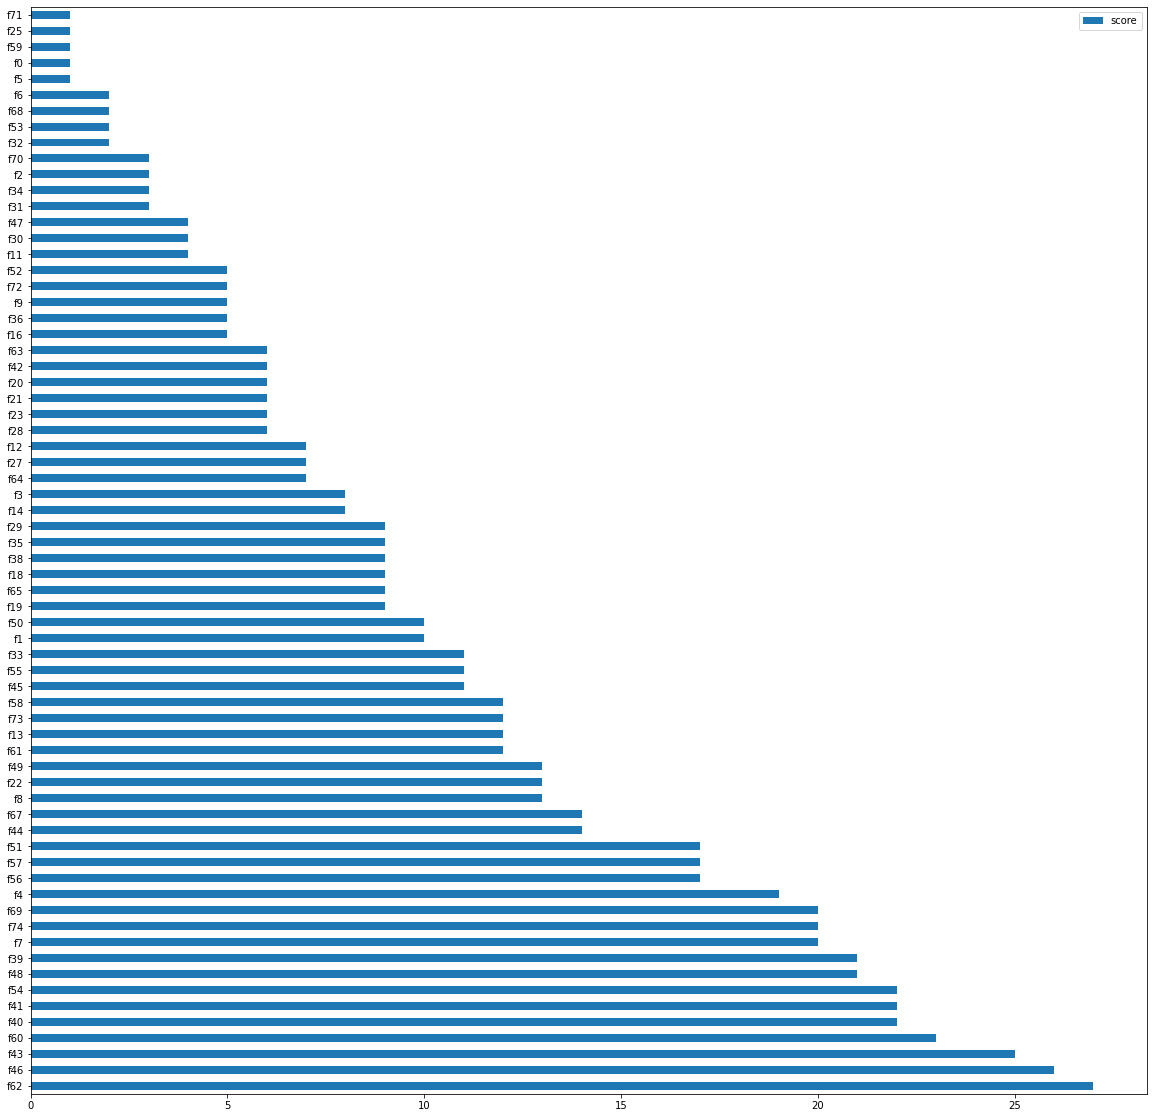

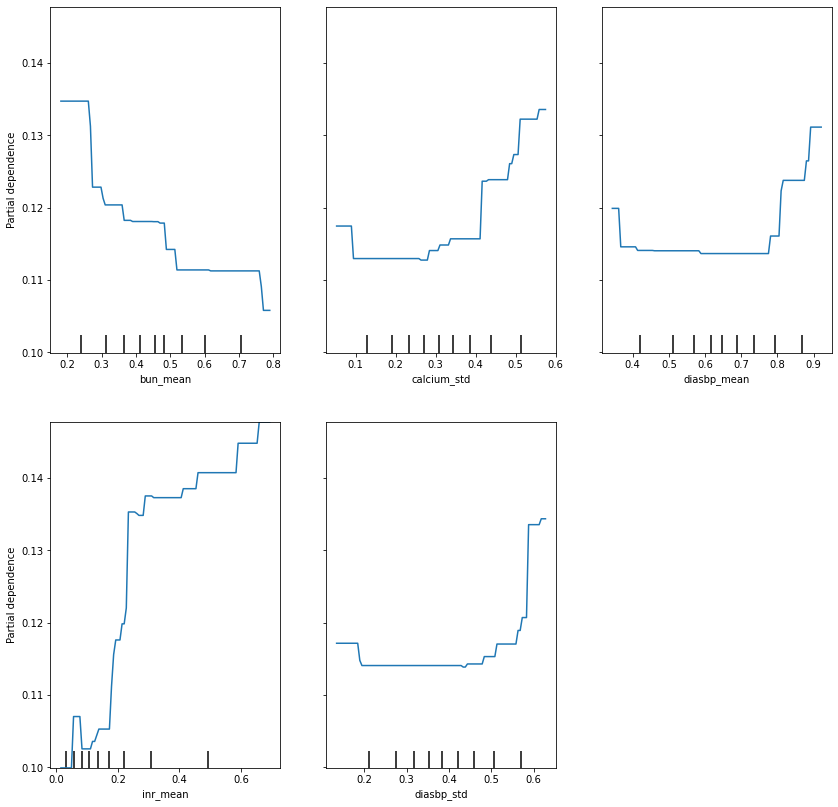

In [81]:
model = model_learn(X, y, results[results.mean_test_score == np.max(results.mean_test_score)]['params'].values[0])
var_imp = feature_importance_plot(model)
plot_pdp(model, X, var_imp)

## One of the best

In [ ]:
model = model_learn(X, y, results[results.mean_test_score > 0.86]['params'].values[5])
var_imp = feature_importance_plot(model)
plot_pdp(model, X, var_imp)

### One of the best

bun_mean calcium_std diasbp_mean inr_mean diasbp_std


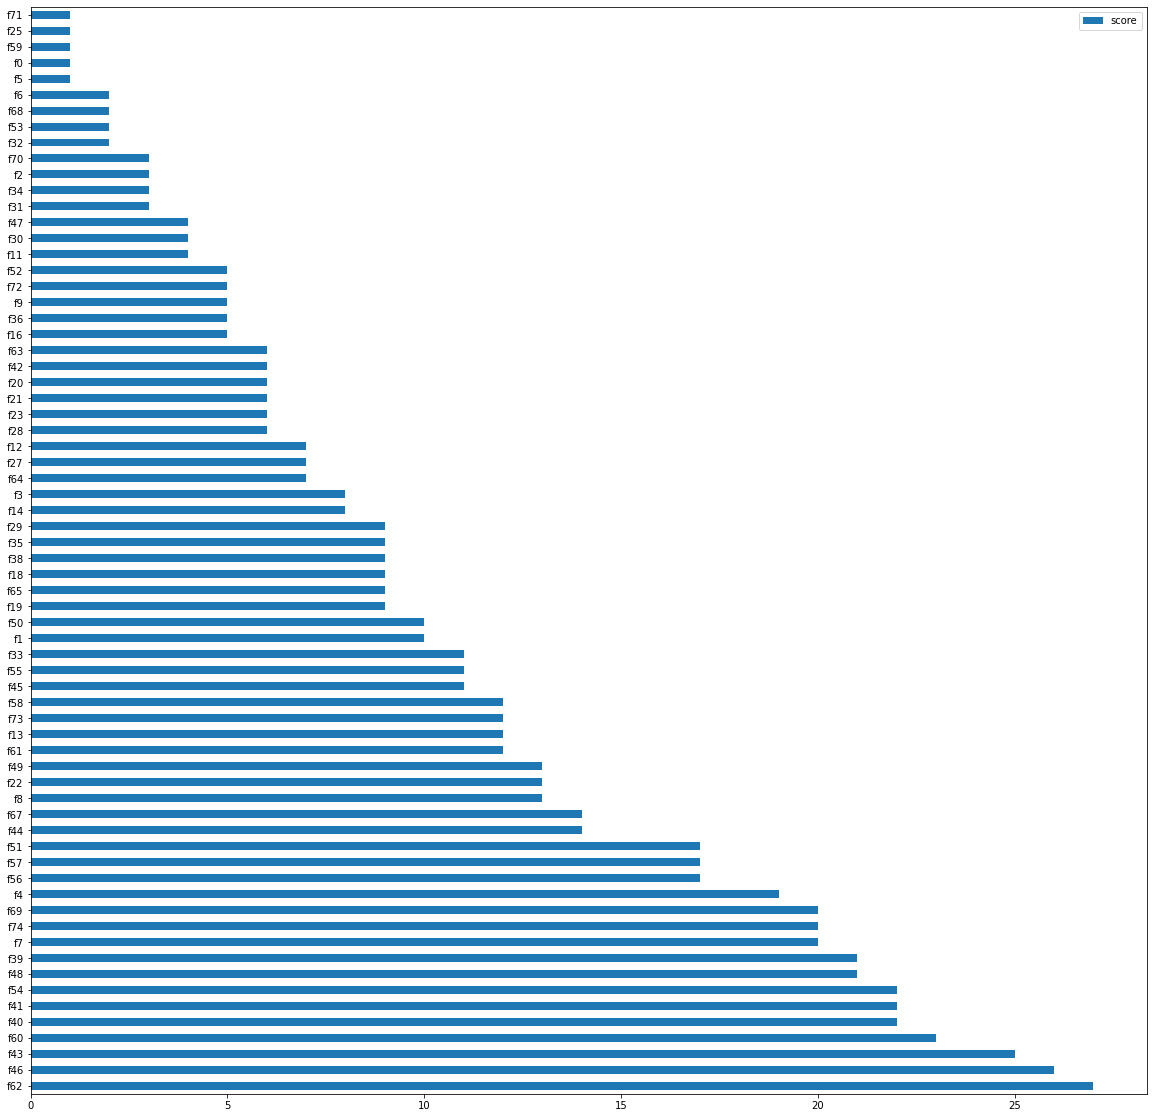

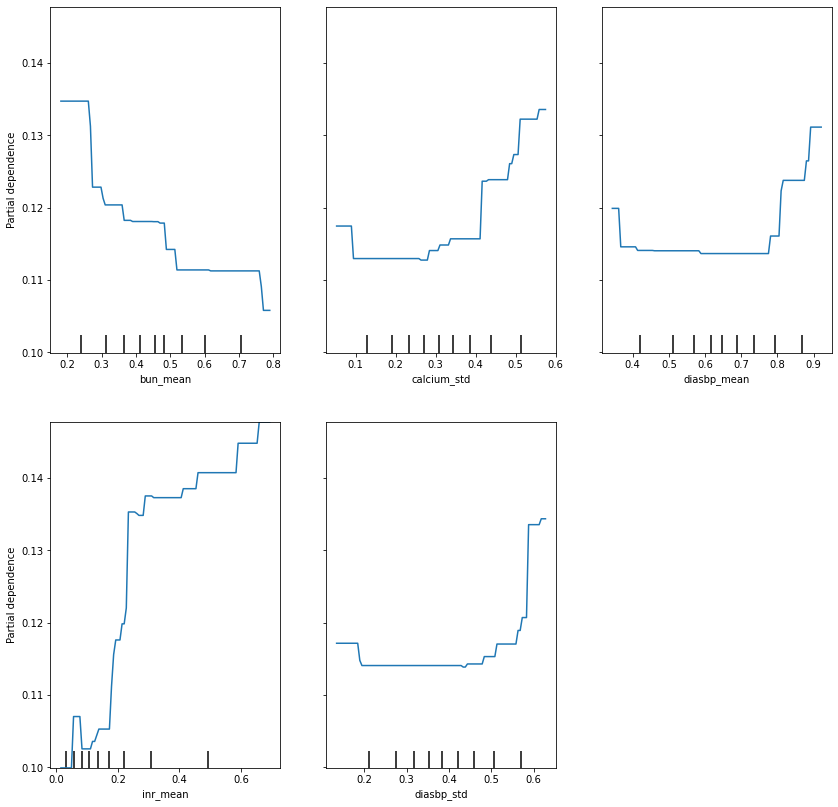

In [80]:
model = model_learn(X, y, results[results.mean_test_score > 0.86]['params'].values[0])
var_imp = feature_importance_plot(model)
plot_pdp(model, X, var_imp)